# Project P-129

## >< Fraudulent Transactions Prediction

## 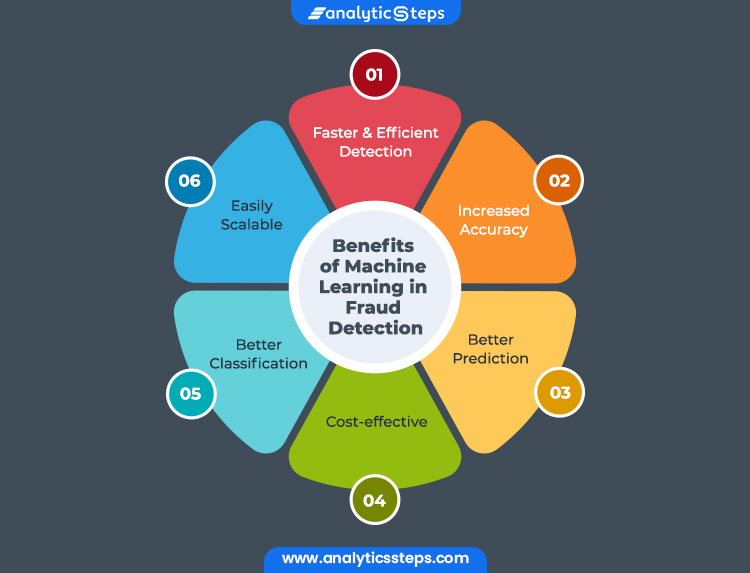

## What is fraudulent transactions?

A fraudulent transaction is the unauthorized use of an individual’s accounts or payment information. Fraudulent transactions can result in the victim’s loss of funds, personal property, or personal information.

The fraudulent transaction is one of the most serious threats to online security nowadays. Artificial Intelligence is vital for financial risk control in the cloud environment. Many studies attempted to explore methods for online transaction fraud detection; however, the existing methods are insufficient to conduct detection with high precision.

Fraud prevention is the implementation of a strategy to detect fraudulent transactions or banking actions and prevent these actions from causing financial damage and the reputation of the client and the financial institution.

There are always financial frauds and They can happen in virtual and physical ways. So the investment in security has been increasing. Keep your business safe from online payment fraud There is no guaranteed method for payment fraud prevention. By taking certain precautions, however, you can minimize the damage they cause and make sure your business has the best chance to thrive despite them.

## FRAUDULENT TRANSACTIONS & BUSINESS UNDERSTANDING:
What is Payment Fraud?

Payment fraud is any type of false or illegal transaction completed by a cybercriminal. The perpetrator deprives the victim of funds, personal property, interest, or sensitive information via the Internet. Ecommerce businesses rely on electronic transactions to charge customers for products and services. The increased volume of electronic transactions has also resulted in an increase in fraudulent activities.

Types of fraud:-

    =>Business credit card fraud
    =>Wire fraud
    =>ACH fraud
    =>Forgery
    =>Invoice fraud
    =>Phishing
    =>Identity theft
    =>Pagejacking
    =>Merchant identity fraud

## Business Objective

    Objective: objective:The Aim of this project is to build a model to predict whether a transaction is fraudulent       or not. To predict feature importance which can help in predicting fraud more easily. Our main goal is to minimize     the fraud and derive the best accuracy model with less log loss value.

## Import Necessary Libreries

In [1]:
import pandas as pd
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.ensemble import IsolationForest
import plotly.graph_objs as go
import plotly.tools as tls
import cufflinks
import cufflinks as cf
import plotly.figure_factory as ff
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import silhouette_score
## Hyperopt modules
#from hyperopt import fmin, hp, tpe, Trials, space_eval, STATUS_OK, STATUS_RUNNING
#from functools import partial
from sklearn.metrics import roc_auc_score
import matplotlib.gridspec as gridspec
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
sns.set_palette("hls")
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import scipy
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.ensemble import IsolationForest
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import re
import sys
#preprocessing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#ML libraries
import tensorflow as tf
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

C:\Users\Siddhartha-PC\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



In [2]:
import plotly.express as px
import plotly.io as pio
pio.templates

Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

## About Dataset:

## 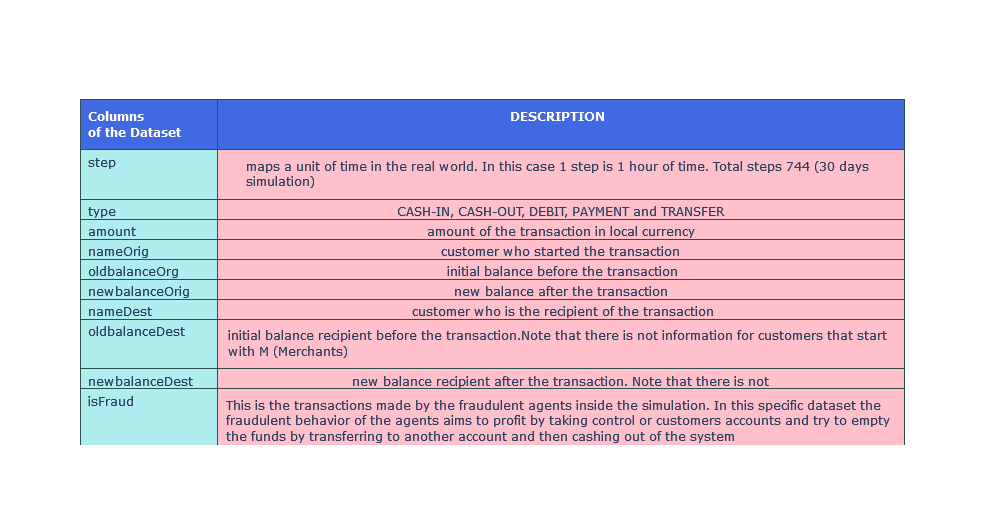

## Import Data

In [2]:
data = pd.read_csv('./trans_data.csv')
data.shape

(5913680, 14)

In [3]:
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,nameOrigin,nameDestination,orig_change,orig_txn_diff,dest_change,dest_txn_diff,Fraud_Id
0,1.0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,C,M,-9839.64,-1.455192e-11,0.0,9839.64,0
1,1.0,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,C,M,-1864.28,1.136868e-12,0.0,1864.28,0
2,1.0,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,C,M,-11668.14,0.000000e+00,0.0,11668.14,0
3,1.0,PAYMENT,7817.71,53860.0,46042.29,0.0,0.0,C,M,-7817.71,9.094947e-13,0.0,7817.71,0
4,1.0,PAYMENT,7107.77,183195.0,176087.23,0.0,0.0,C,M,-7107.77,1.091394e-11,0.0,7107.77,0


In [4]:
data=data.drop(columns=["nameOrigin","nameDestination","orig_change","orig_txn_diff","dest_change","dest_txn_diff"]
               ,axis=1)
data.head(5)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,Fraud_Id
0,1.0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1.0,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1.0,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0
3,1.0,PAYMENT,7817.71,53860.0,46042.29,0.0,0.0,0
4,1.0,PAYMENT,7107.77,183195.0,176087.23,0.0,0.0,0


## Data Understanding & EDA

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5913680 entries, 0 to 5913679
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            float64
 1   type            object 
 2   amount          float64
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
 7   Fraud_Id        int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 360.9+ MB


In [7]:
data.isna().sum()

step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
Fraud_Id          0
dtype: int64

<AxesSubplot:>

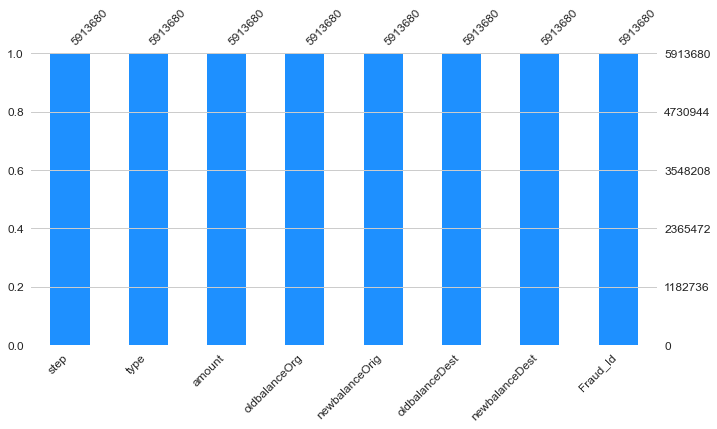

In [8]:
import missingno as msno
msno.bar(data,color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12)

In [5]:
data[data.duplicated()].count()

step              91802
type              91802
amount            91802
oldbalanceOrg     91802
newbalanceOrig    91802
oldbalanceDest    91802
newbalanceDest    91802
Fraud_Id          91802
dtype: int64

In [6]:
data=data.drop_duplicates()

In [7]:
data[data.duplicated()].count()

step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
Fraud_Id          0
dtype: int64

In [17]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
step,5821878.0,NaN,NaN,NaN,241.910046,139.0531,1.0,155.0,238.0,334.0,603.5
type,5821878,5,PAYMENT,2150937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amount,5821878.0,NaN,NaN,NaN,126277.968368,141800.931848,0.0,12238.55,67527.005,202098.79,501719.33875
oldbalanceOrg,5821878.0,NaN,NaN,NaN,70654.615048,102609.991892,0.0,0.0,11596.0,103684.0,268287.9375
newbalanceOrig,5821878.0,NaN,NaN,NaN,91809.833532,141902.470393,0.0,0.0,0.0,161479.68,360646.025
oldbalanceDest,5821878.0,NaN,NaN,NaN,567359.159018,819053.502621,0.0,0.0,89018.965,860254.5125,2357591.76875
newbalanceDest,5821878.0,NaN,NaN,NaN,673966.436682,948242.024968,0.0,0.0,164010.935,1022082.345,2779773.125
Fraud_Id,5821878.0,NaN,NaN,NaN,0.128574,0.334728,0.0,0.0,0.0,0.0,1.0


In [8]:
numeric_data=data.select_dtypes(exclude=["object"]).columns.to_list()
categorical_data=data.select_dtypes(include=["object"]).columns.to_list()

In [9]:
print("Numeric Columns :\n",numeric_data)
print("--"*40)
print("Categorical Data :\n",categorical_data)

Numeric Columns :
 ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'Fraud_Id']
--------------------------------------------------------------------------------
Categorical Data :
 ['type']


In [20]:
data.shape

(5821878, 8)

In [21]:
data.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'Fraud_Id'],
      dtype='object')

In [22]:
data.type.value_counts()

PAYMENT     2150937
CASH_OUT    1780905
CASH_IN     1395989
TRANSFER     452615
DEBIT         41432
Name: type, dtype: int64

In [23]:
data.type.unique()

array(['PAYMENT', 'DEBIT', 'CASH_IN', 'TRANSFER', 'CASH_OUT'],
      dtype=object)

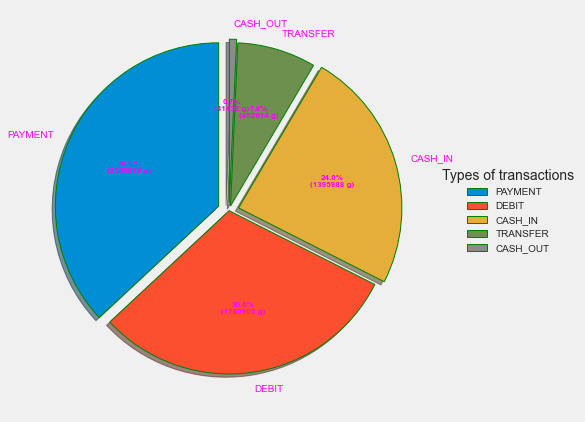

In [30]:
explode = (0.07, 0.0, 0.06, 0.03, 0.05) 
colors = ( "orange", "cyan","green", "indigo", "brown")
sns.set_palette("hls")
plt.style.use('fivethirtyeight')
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)
 
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data.type.value_counts(),
                                  autopct = lambda pct: func(pct, data.type.value_counts()),
                                  explode = explode,
                                  labels =data.type.unique(),
                                  shadow = True,
                                  
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="magenta"))
 
# Adding legend
ax.legend(wedges,data.type.unique(),
          title ="Types of transactions",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts, size = 8, weight ="bold")
plt.show()

#### inferences:
     Plot Shows That the Type categorical variable has 5 Distinct Class
     PAYMENT     
     CASH_OUT    
     CASH_IN     
     TRANSFER    
     DEBIT         
     

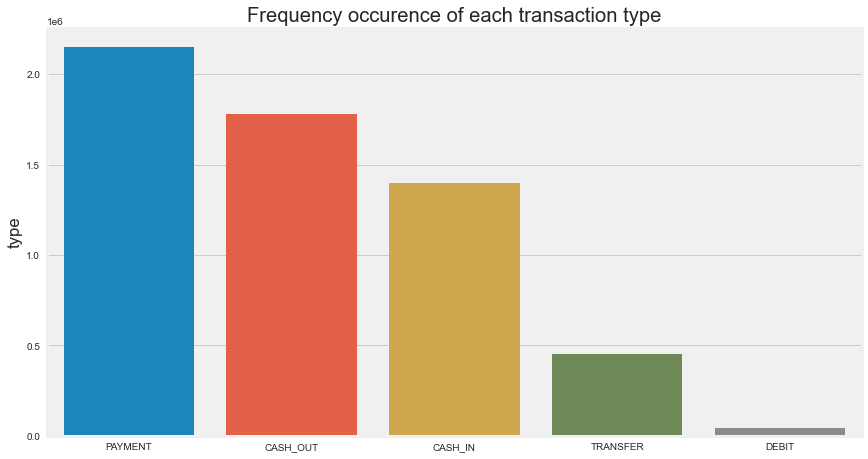

In [29]:
figure = plt.figure(figsize = [13, 7])
sns.set_palette("hls")
plt.style.use('fivethirtyeight')
sns.barplot(data['type'].value_counts().index, data['type'].value_counts())
plt.title('Frequency occurence of each transaction type')
plt.show()

#### inferences:
     Plot Shows That the Type categorical variable has 5 Distinct Class
     PAYMENT     
     CASH_OUT    
     CASH_IN     
     TRANSFER    
     DEBIT  

In [25]:
data.Fraud_Id.value_counts()

0    5073336
1     748542
Name: Fraud_Id, dtype: int64

In [26]:
data.Fraud_Id.unique()

array([0, 1], dtype=int64)

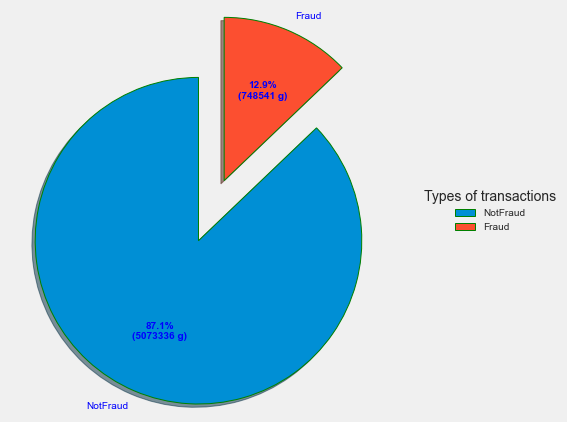

In [34]:
explode = (0.2, 0.2)
colors = ( "orange", "cyan")
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)
 
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data.Fraud_Id.value_counts(),
                                  autopct = lambda pct: func(pct, data.Fraud_Id.value_counts()),
                                  explode = explode,
                                  labels =["NotFraud","Fraud"],
                                  shadow = True,
                                  
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="blue"))
 
# Adding legend
ax.legend(wedges,["NotFraud","Fraud"],
          title ="Types of transactions",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts, size = 10, weight ="bold")
plt.show()

#### Inferences:
     Target variable Fraud Id has two different class:
    0 th Class has points    5073336
    1 th Class has points    748542

## Different kind of transactions Types on Not fraud data

PAYMENT     2150937
CASH_IN     1395989
CASH_OUT    1035156
TRANSFER     449822
DEBIT         41432
Name: type, dtype: int64

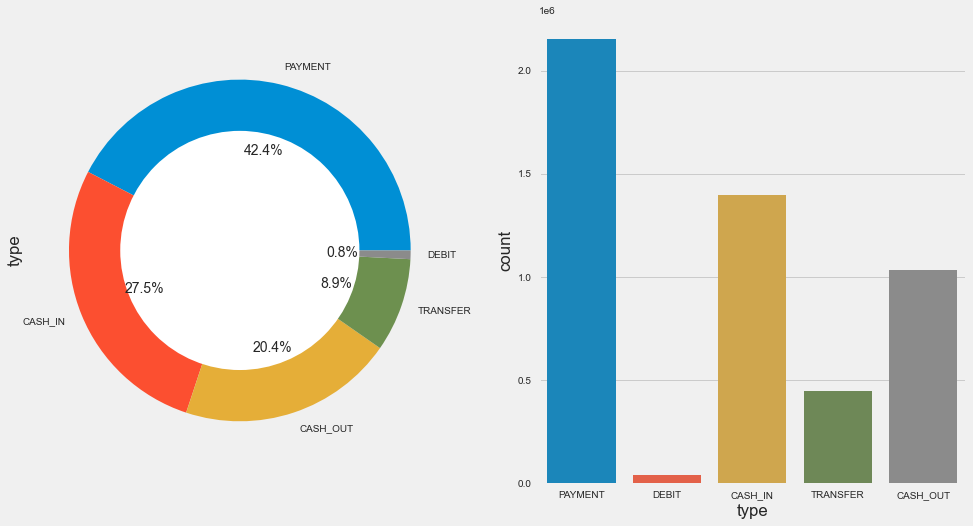

In [44]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
data[data["Fraud_Id"]==0]['type'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='type',data=data[data["Fraud_Id"]==0])
data[data["Fraud_Id"]==0]['type'].value_counts()

#### Inferences:
      Different kind of transactions Types on Not fraud data
      PAYMENT     2150937
      CASH_IN     1395989
      CASH_OUT    1035156
      TRANSFER     449822
      DEBIT         41432

<AxesSubplot:xlabel='type'>

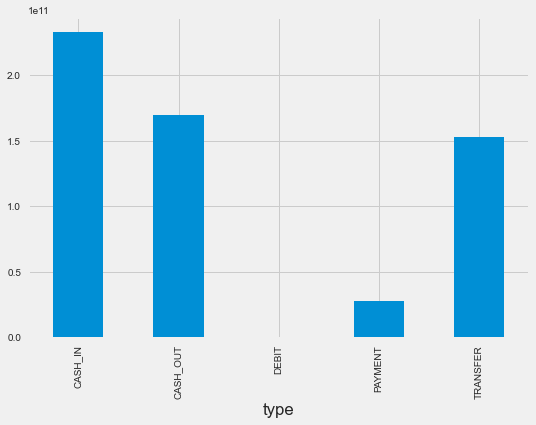

In [36]:
data[data["Fraud_Id"]==0].groupby(by=["type"])["amount"].agg("sum").plot(kind='bar')

## Different kind of Transactions Types on  fraud data

CASH_OUT    745749
TRANSFER      2793
Name: type, dtype: int64

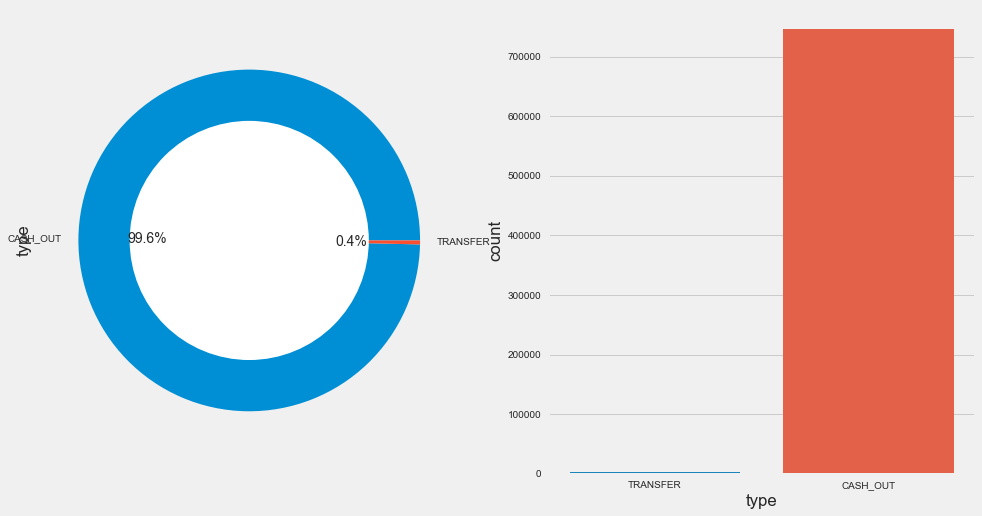

In [45]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
data[data["Fraud_Id"]==1]['type'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='type',data=data[data["Fraud_Id"]==1])
data[data["Fraud_Id"]==1]['type'].value_counts()

#### Inferences:
     Different kind of Transactions Types on fraud data:
     There are only two mode here:
     1)CASH_OUT    
     2)TRANSFER     
     
     
     So Only for Cash out and transfer mode of Transactions fraud can happen 

### Correlation Matrix:

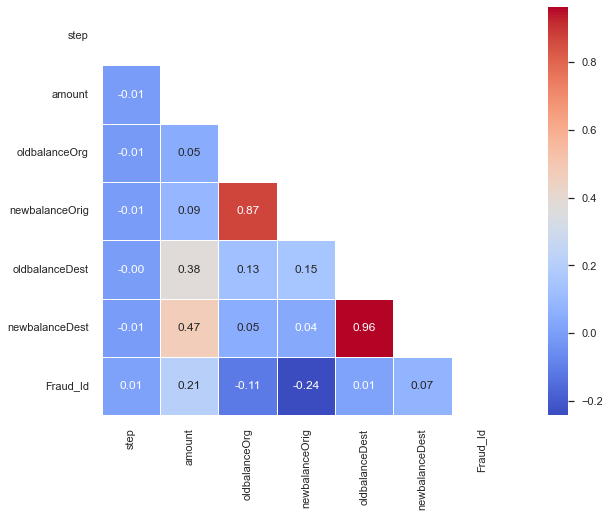

In [50]:
import seaborn as sns
corr_matrix = data.corr()
sns.set(rc = {'figure.figsize':(12,7)}) # handle size of thr figure 
#mask = np.zeros_like(corr_matrix)
mask = np.triu(np.ones_like(corr_matrix, dtype = bool))
#mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    sns.heatmap(corr_matrix, mask=mask ,annot=True, square=True,linewidths=0.5, 
                fmt= '.2f',cmap='coolwarm');

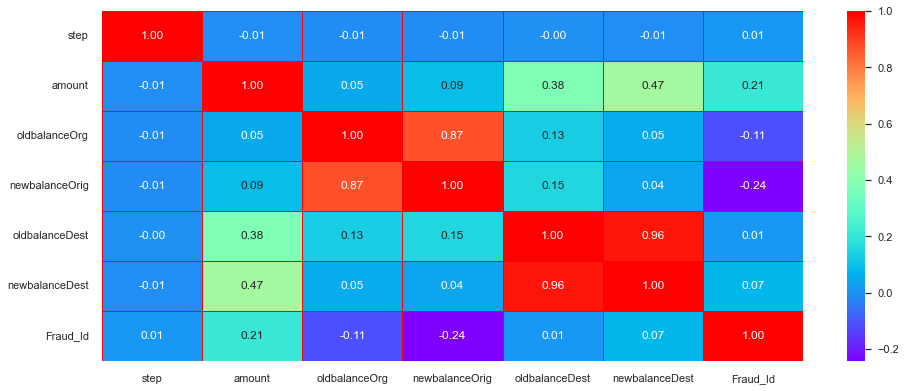

In [49]:
f,ax = plt.subplots(figsize=(14,6))
sns.heatmap(corr_matrix,annot=True,linewidths=0.5,linecolor="red", fmt= '.2f',ax=ax,cmap='rainbow')
plt.show()

In [10]:
def color_(value):
    if value < 0 :
        color = 'red'
    elif value == 1 :
        color = 'blue'
    else:
        color = 'green'
    return 'color: %s' % color
data.select_dtypes('float').corr().style.applymap(color_)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
step,1.000000,-0.008213,-0.012123,-0.011316,-0.002205,-0.008972
amount,-0.008213,1.000000,0.047457,0.088286,0.378542,0.468899
oldbalanceOrg,-0.012123,0.047457,1.000000,0.872201,0.128274,0.052296
newbalanceOrig,-0.011316,0.088286,0.872201,1.000000,0.151034,0.038256
oldbalanceDest,-0.002205,0.378542,0.128274,0.151034,1.000000,0.962734
newbalanceDest,-0.008972,0.468899,0.052296,0.038256,0.962734,1.000000


In [11]:
data.select_dtypes('float').cov().style.applymap(color_)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
step,19335.764494,-161947.379518,-172972.280243,-223291.509758,-251158.399322,-1183037.123442
amount,-161947.379518,20107504273.040470,690514536.189614,1776481168.794934,43964884573.158661,63048966119.420097
oldbalanceOrg,-172972.280243,690514536.189614,10528810436.766638,12699784097.958620,10780539121.950485,5088333505.288434
newbalanceOrig,-223291.509758,1776481168.794934,12699784097.958620,20136311102.794949,17554084312.289787,5147612104.394282
oldbalanceDest,-251158.399322,43964884573.158661,10780539121.950485,17554084312.289787,670848640165.011230,747717993954.046387
newbalanceDest,-1183037.123442,63048966119.420097,5088333505.288434,5147612104.394282,747717993954.046387,899162937915.154297


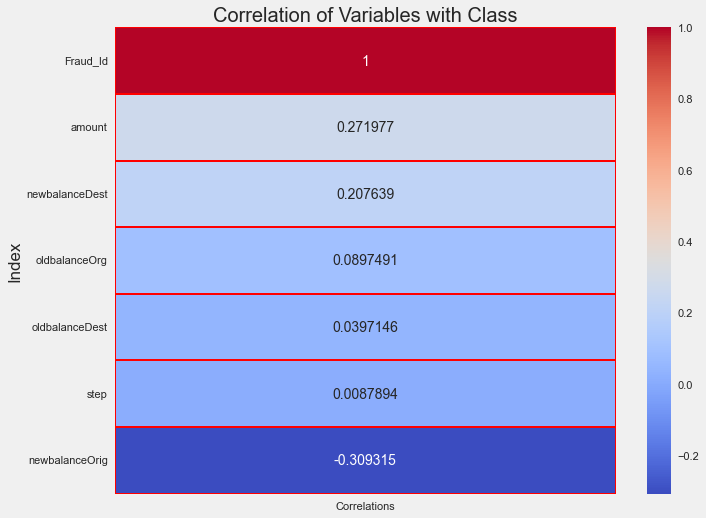

In [112]:
corr = data.corrwith(data['Fraud_Id'],method='spearman').reset_index()

corr.columns = ['Index','Correlations']
corr = corr.set_index('Index')
corr = corr.sort_values(by=['Correlations'], ascending = False).head(10)

plt.figure(figsize=(10, 8))
fig = sns.heatmap(corr, annot=True, fmt="g", cmap='coolwarm', linewidths=0.4, linecolor='red')

plt.title("Correlation of Variables with Class", fontsize=20)
plt.show()

In [113]:
#Pivot table
data_pivot1=pd.pivot_table(data,index=["type"],
                               values=['amount','Fraud_Id'],
                               aggfunc=[np.sum,np.mean], margins=True)

#Adding color gradient 
cm = sns.light_palette("coral", as_cmap=True)
data_pivot1.style.background_gradient(cmap=cm)

### Amount Distribution 

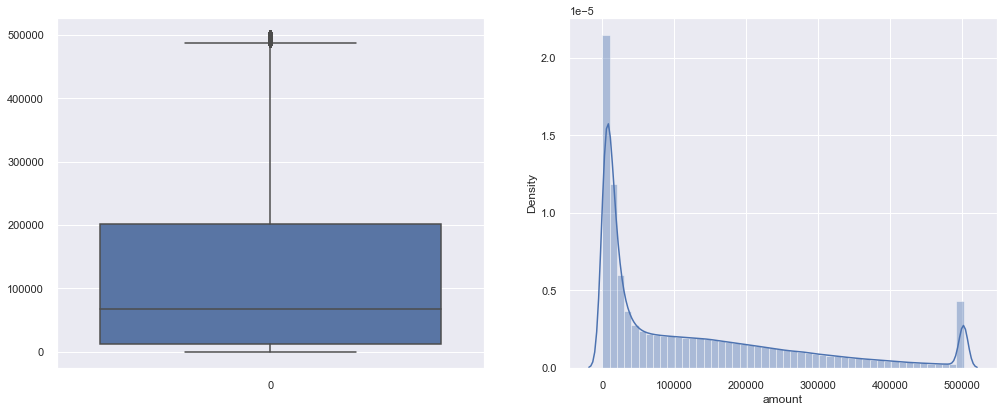

In [53]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(data=data["amount"])
plt.subplot(1,2,2)
sns.distplot(data["amount"])
plt.show()

#### inferences:
    1.Amount Distribution shows tailed portions.
    2. Presence of Outliers
    3.We have to handle it using either imputation tech or Clipping techniques

## Distribution Of Amount

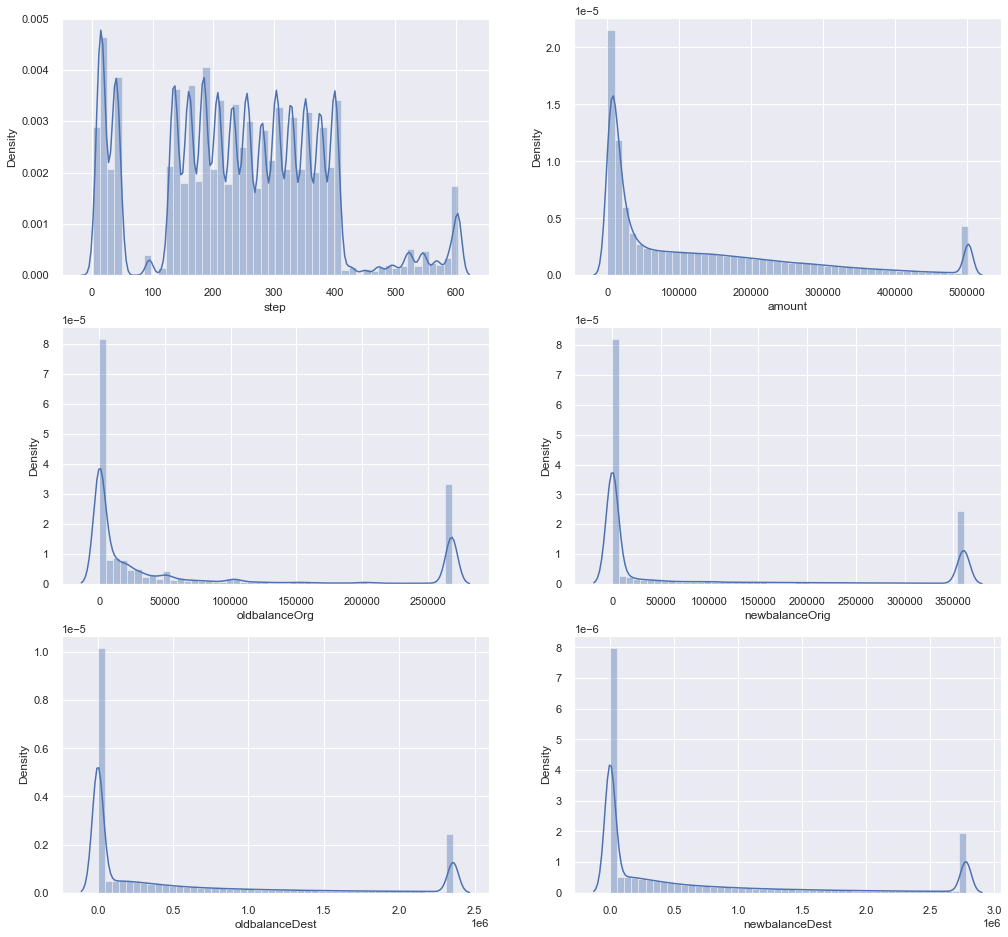

In [59]:
plt.figure(figsize = (15,15))
plt.subplot(3,2,1)
sns.distplot(data["step"],label="step")
plt.subplot(3,2,2)
sns.distplot(data["amount"],label="amount")
plt.subplot(3,2,3)
sns.distplot(data["oldbalanceOrg"],label="oldbalanceOrg")
plt.subplot(3,2,4)
sns.distplot(data["newbalanceOrig"],label="newbalanceOrig")
plt.subplot(3,2,5)
sns.distplot(data["oldbalanceDest"],label="oldbalanceDest")
plt.subplot(3,2,6)
sns.distplot(data["newbalanceDest"],label="newbalanceDest")
plt.show()

#### inferences:
      Ditributions Shows tailed portions might be outliers...

In [60]:
data.skew()

step              0.223567
amount            1.208300
oldbalanceOrg     1.202641
newbalanceOrig    1.163661
oldbalanceDest    1.303925
newbalanceDest    1.304842
Fraud_Id          2.219273
dtype: float64

In [61]:
data.kurtosis()

step             -0.136925
amount            0.502814
oldbalanceOrg    -0.292788
newbalanceOrig   -0.429683
oldbalanceDest    0.190123
newbalanceDest    0.241839
Fraud_Id          2.925172
dtype: float64

## Outliers Distributions  & Handling the Outliers

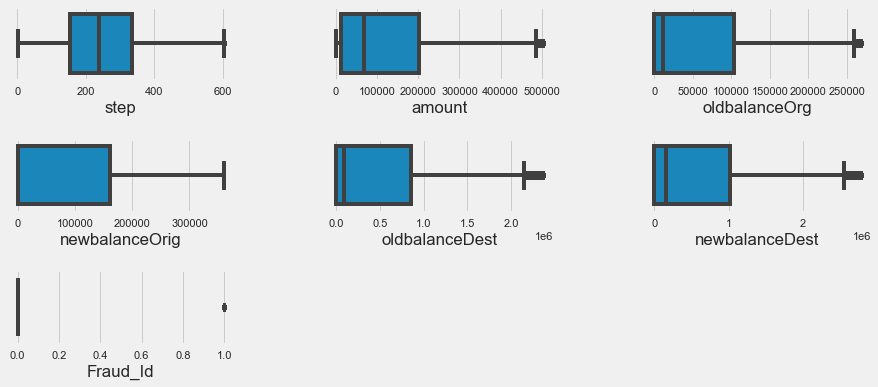

In [67]:
#Outliers
plt.subplots(figsize=(15, 15))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.8)

for i, column in enumerate(numeric_data, 1):
    plt.subplot(7, 3, i)
    sns.boxplot(data[column])

In [12]:
# Detecting outliers using the Inter Quantile Range(IQR)
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
#calc Lower bound and upper bound
LB = Q1 - 1.5 * IQR
UB = Q3 + 1.5 * IQR
# check if value bigger than upper bound, or smaller than Lower bound
No_Outliers = data[(data < LB) | (data > UB)].count()
print('Number of Outliers at each column:')
pd.DataFrame(No_Outliers, columns=['No. Outliers'])

Number of Outliers at each column:


,No. Outliers
step,92882
type,0
amount,259387
oldbalanceOrg,1043402
newbalanceOrig,0
oldbalanceDest,719208
newbalanceDest,674631
Fraud_Id,748542


### **Finding the Boundary for outliers**

In [69]:
print("Highest allowed",data['amount'].mean() + 3*data['amount'].std())
print("Lowest allowed",data['amount'].mean() - 3*data['amount'].std())

Highest allowed 551680.763911409
Lowest allowed -299124.8271760909


In [70]:
print("Highest allowed",data['oldbalanceOrg'].mean() + 3*data['oldbalanceOrg'].std())
print("Lowest allowed",data['oldbalanceOrg'].mean() - 3*data['oldbalanceOrg'].std())

Highest allowed 378484.5907254212
Lowest allowed -237175.3606287354


In [71]:
print("Highest allowed",data['newbalanceOrig'].mean() + 3*data['newbalanceOrig'].std())
print("Lowest allowed",data['newbalanceOrig'].mean() - 3*data['newbalanceOrig'].std())

Highest allowed 517517.24470940186
Lowest allowed -333897.57764572185


In [72]:
print("Highest allowed",data['oldbalanceDest'].mean() + 3*data['oldbalanceDest'].std())
print("Lowest allowed",data['oldbalanceDest'].mean() - 3*data['oldbalanceDest'].std())

Highest allowed 3024519.6668809806
Lowest allowed -1889801.3488449608


In [73]:
print("Highest allowed",data['newbalanceDest'].mean() + 3*data['newbalanceDest'].std())
print("Lowest allowed",data['newbalanceDest'].mean() - 3*data['newbalanceDest'].std())

Highest allowed 3518692.511585325
Lowest allowed -2170759.638221875


In [13]:
q3,q1=np.percentile(data['step'],[75,25])
iqr=q3-q1
lower=q1-(1.5*iqr)
upper=q3+(1.5*iqr)
data['step']=data['step'].clip(upper=upper)

In [14]:
q3,q1=np.percentile(data['amount'],[75,25])
iqr=q3-q1
lower=q1-(1.5*iqr)
upper=q3+(1.5*iqr)
data['amount']=data['amount'].clip(upper=upper)

In [15]:
q3,q1=np.percentile(data['oldbalanceOrg'],[75,25])
iqr=q3-q1
lower=q1-(1.5*iqr)
upper=q3+(1.5*iqr)
data['oldbalanceOrg']=data['oldbalanceOrg'].clip(upper=upper)

In [16]:
q3,q1=np.percentile(data['newbalanceOrig'],[75,25])
iqr=q3-q1
lower=q1-(1.5*iqr)
upper=q3+(1.5*iqr)
data['newbalanceOrig']=data['newbalanceOrig'].clip(upper=upper)

In [17]:
q3,q1=np.percentile(data['oldbalanceDest'],[75,25])
iqr=q3-q1
lower=q1-(1.5*iqr)
upper=q3+(1.5*iqr)
data['oldbalanceDest']=data['oldbalanceDest'].clip(upper=upper)

In [18]:
q3,q1=np.percentile(data['newbalanceDest'],[75,25])
iqr=q3-q1
lower=q1-(1.5*iqr)
upper=q3+(1.5*iqr)
data['newbalanceDest']=data['newbalanceDest'].clip(upper=upper)

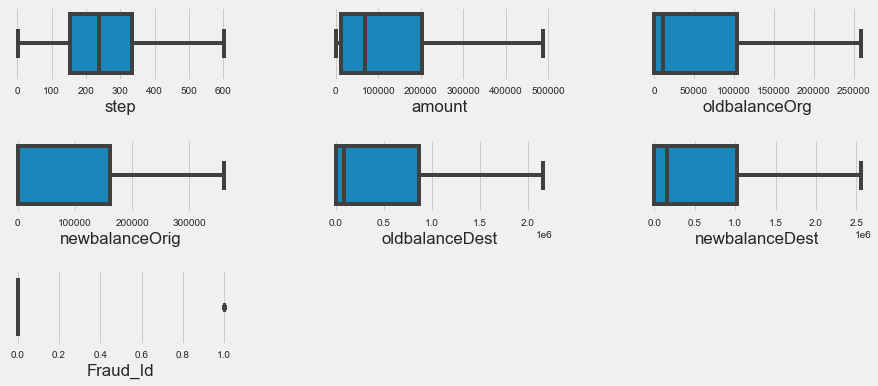

In [20]:
#Outliers
plt.subplots(figsize=(15, 15))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.8)

for i, column in enumerate(numeric_data, 1):
    plt.subplot(7, 3, i)
    sns.boxplot(data[column])

#### inferences:
    Outliers clipped toward the upper and lower whiskers regions 

In [81]:
# Detecting outliers using the Inter Quantile Range(IQR)
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
#calc Lower bound and upper bound
LB = Q1 - 1.5 * IQR
UB = Q3 + 1.5 * IQR
# check if value bigger than upper bound, or smaller than Lower bound
No_Outliers = data[(data < LB) | (data > UB)].count()
print('Number of Outliers at each column:')
pd.DataFrame(No_Outliers, columns=['No. Outliers'])

Number of Outliers at each column:


,No. Outliers
step,0
type,0
amount,0
oldbalanceOrg,0
newbalanceOrig,0
oldbalanceDest,0
newbalanceDest,0
Fraud_Id,748542


### Checking Distribution after outlier treatments

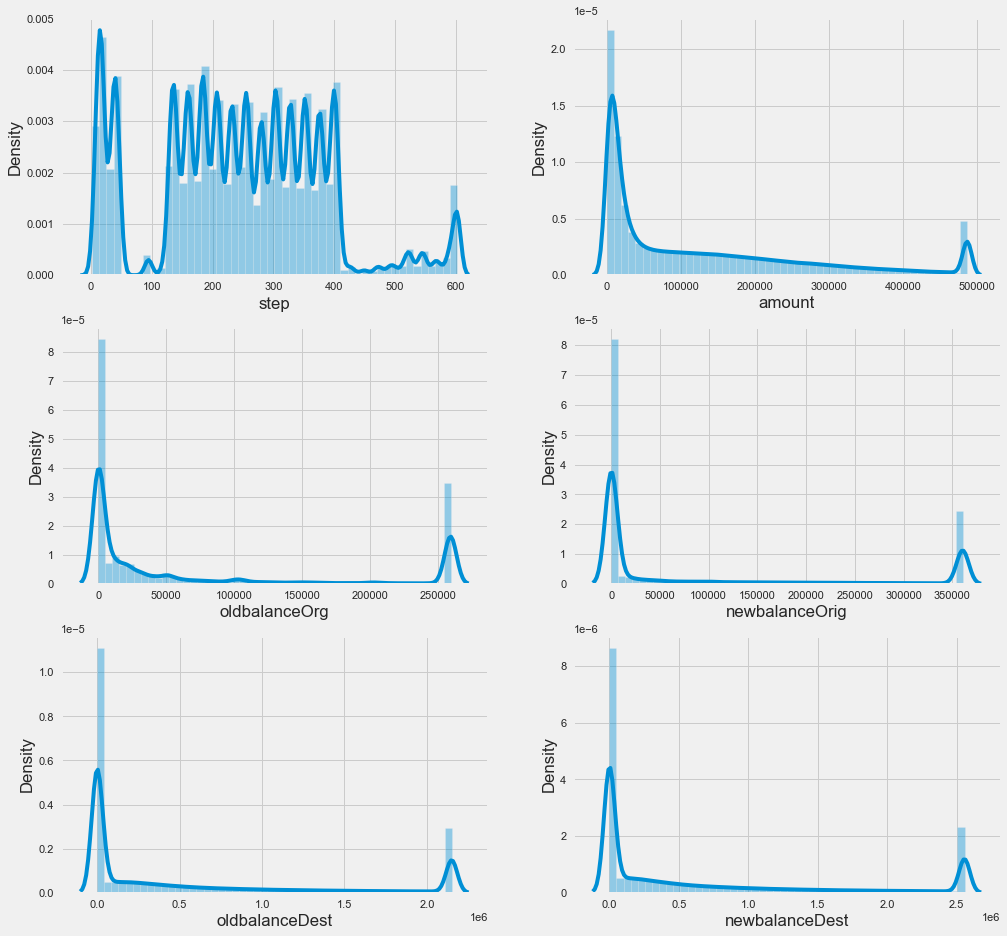

In [82]:
sns.set_palette("hls")
plt.style.use('fivethirtyeight')
plt.figure(figsize = (15,15))
plt.subplot(3,2,1)
sns.distplot(data["step"],label="step")
plt.subplot(3,2,2)
sns.distplot(data["amount"],label="amount")
plt.subplot(3,2,3)
sns.distplot(data["oldbalanceOrg"],label="oldbalanceOrg")
plt.subplot(3,2,4)
sns.distplot(data["newbalanceOrig"],label="newbalanceOrig")
plt.subplot(3,2,5)
sns.distplot(data["oldbalanceDest"],label="oldbalanceDest")
plt.subplot(3,2,6)
sns.distplot(data["newbalanceDest"],label="newbalanceDest")
plt.show()

#### Inferences:
    1.outlier treatments treatments actually adjust the Heavy Tailed portion of the Distributions for some variables
    2. Butfor  balances of origin and destination  still have htailed portion which can be fixed using transformations like log ,minmax scaler,standard scaler,power transform

In [83]:
data1=data.copy()

In [84]:
data1.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'Fraud_Id'],
      dtype='object')

### Multi Level Pychart :SunBurst plot

In [93]:
fig = px.sunburst(data.loc[:,:], path=['Fraud_Id', 'type'], values='amount', color='type')
fig.show()

In [94]:
fig = px.sunburst(data.loc[:,:], path=[ 'type','Fraud_Id'], values='amount', color='Fraud_Id')
fig.show()

### Lets Check How Power Transformer Performs on Skewness

In [85]:
import numpy as np
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()

In [88]:
data2=pt.fit_transform(data1.loc[:,['step','amount','oldbalanceOrg','newbalanceOrig',
                                    'oldbalanceDest','newbalanceDest']])

In [91]:
data3=pd.DataFrame(data=data2,columns=['step','amount','oldbalanceOrg','newbalanceOrig',
                                    'oldbalanceDest','newbalanceDest'])
data3

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,-2.080498,-0.963658,1.063574,1.178866,-1.081982,-1.156492
1,-2.080498,-1.601685,0.490253,0.943966,-1.081982,-1.156492
2,-2.080498,-0.886243,0.664904,0.995362,-1.081982,-1.156492
3,-2.080498,-1.064265,0.734973,1.044941,-1.081982,-1.156492
4,-2.080498,-1.104642,1.085741,1.188426,-1.081982,-1.156492
...,...,...,...,...,...,...
5821873,2.237464,1.247011,1.191524,-0.866162,0.890431,0.889475
5821874,2.237464,0.602708,1.015985,-0.866162,-1.081982,0.526525
5821875,2.237464,-0.058815,0.738961,-0.866162,-1.081982,0.344930
5821876,2.237464,1.192571,1.191524,-0.866162,0.804549,0.824179


### Distribution Plot For Power Transformed Data

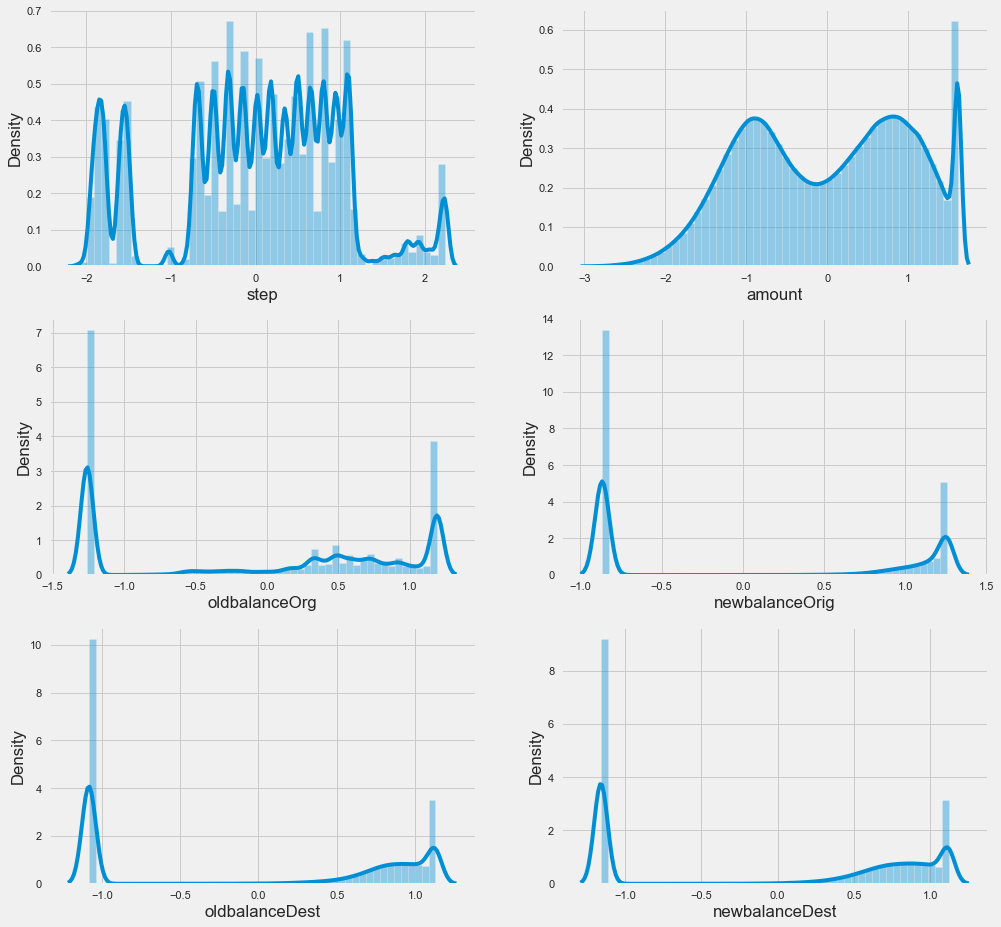

In [92]:
sns.set_palette("hls")
plt.style.use('fivethirtyeight')
plt.figure(figsize = (15,15))
plt.subplot(3,2,1)
sns.distplot(data3["step"],label="step")
plt.subplot(3,2,2)
sns.distplot(data3["amount"],label="amount")
plt.subplot(3,2,3)
sns.distplot(data3["oldbalanceOrg"],label="oldbalanceOrg")
plt.subplot(3,2,4)
sns.distplot(data3["newbalanceOrig"],label="newbalanceOrig")
plt.subplot(3,2,5)
sns.distplot(data3["oldbalanceDest"],label="oldbalanceDest")
plt.subplot(3,2,6)
sns.distplot(data3["newbalanceDest"],label="newbalanceDest")
plt.show()

#### Inferences:
     1.Power Transformation only improves amout distribution in such a way to clip it to 1th and  99th percentile 
     2.Power Transformation didn't do better performance 
     3. so will use other transformation like MINMAX Scaler or Standard scaler

In [ ]:
plt.figure(figsize=(15,6))
#sns.boxenplot(x='Airline',y='Price',hue='Destination',data=df)
sns.swarmplot(x='Airline',y='Price',hue='Destination',data=df)
plt.xticks(rotation=45)
plt.show()

## Feature importance:

In [95]:
from sklearn.tree import DecisionTreeRegressor

In [96]:
def variable_importance( X , y ):
    tree = DecisionTreeRegressor( random_state = 99 )
    tree.fit( X , y )
    plot_model_var_imp( tree , X , y )
    
def plot_model_var_imp( model , X , y ):
    imp = pd.DataFrame( 
        model.feature_importances_  , 
        columns = [ 'Importance' ] , 
        index = X.columns 
    )
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    imp[ : 10 ].plot( kind = 'barh' )
    print (model.score( X , y ))

In [97]:
X= data[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]
y= data['Fraud_Id']

0.9999510296795419


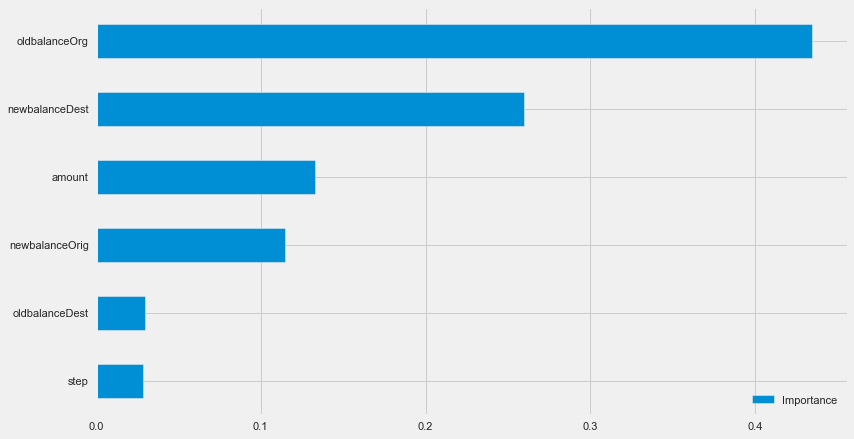

In [98]:
variable_importance(X, y)

#### Inferences:
     DecisionTreeRegressor algorithm gives feature importance in the following order : 
     [oldbalanceorg,newbalancedest,amount,newbalanceorigin,oldbalancedest,step]

## Feature Selection Using Mutual Information:

In [99]:
y=y.astype("int")
from sklearn import feature_selection as fs

In [101]:
X= data.loc[:,['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]
y= data.loc[:,['Fraud_Id']].astype("int")

In [102]:
ds=pd.concat([X,y],axis=1)

In [103]:
def plot_imp(best_features, scores, method_name):   
    plt.barh(best_features, scores)
    plt.title(method_name + ' Feature Importances')
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()

In [104]:
num_features = 6
fit_mutual_info = fs.SelectKBest(fs.mutual_info_classif,k=num_features)
fit_mutual_info.fit_transform(X, y)
indices_mutual_info = np.argsort(fit_mutual_info.scores_)[::-1][0:num_features]
best_features_mutual_info = ds.columns[indices_mutual_info].values
best_features_mutual_info

array(['oldbalanceOrg', 'newbalanceDest', 'newbalanceOrig', 'amount',
       'oldbalanceDest', 'step'], dtype=object)

In [105]:
feature_importances_mutual_info =fit_mutual_info.scores_[indices_mutual_info]
feature_importances_mutual_info

array([0.14546485, 0.12041875, 0.09141923, 0.06627597, 0.03659201,
       0.00978011])

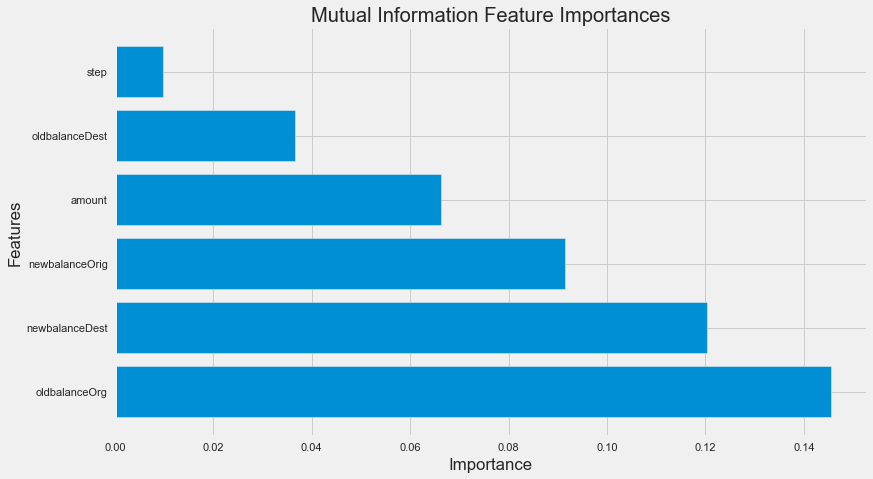

In [106]:
plot_imp(best_features_mutual_info, feature_importances_mutual_info, 'Mutual Information')

#### inferences:
    From Mutual Information Feature Importance it shows importance in the following order
    [oldbalanceorg,newbalancedest,newbalanceorg,amount,oldbalancedest,step] 

In [118]:
#data.to_csv("new_cleaned_data.csv",index=False)

## **Balancing the Target Variable**

In [21]:
data4=data.copy()

In [22]:
data4.head(3)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,Fraud_Id
0,1.0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1.0,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1.0,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [23]:
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import TomekLinks,NearMiss,RandomUnderSampler
from collections import Counter

In [24]:
le_encoder=LabelEncoder()

In [25]:
data4["typeid"]=le_encoder.fit_transform( data4["type"])

In [26]:
data4.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,Fraud_Id,typeid
0,1.0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,3
1,1.0,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,3
2,1.0,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,3
3,1.0,PAYMENT,7817.71,53860.0,46042.29,0.0,0.0,0,3
4,1.0,PAYMENT,7107.77,183195.0,176087.23,0.0,0.0,0,3


In [29]:
le_encoder.inverse_transform(data4["typeid"])


array(['PAYMENT', 'PAYMENT', 'PAYMENT', ..., 'CASH_OUT', 'CASH_OUT',
       'CASH_OUT'], dtype=object)

In [30]:
data4[data4["type"]=="PAYMENT"].head(1)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,Fraud_Id,typeid
0,1.0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,3


In [32]:
data4[data4["type"]=="CASH_OUT"].head(1)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,Fraud_Id,typeid
4125120,1.0,CASH_OUT,5346.89,0.0,0.0,652637.0,2.555206e+06,0,1


In [33]:
data4[data4["type"]=="CASH_IN"].head(1)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,Fraud_Id,typeid
2192927,1.0,CASH_IN,143236.26,0.0,143236.26,608932.17,97263.78,0,0


In [34]:
data4[data4["type"]=="TRANSFER"].head(1)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,Fraud_Id,typeid
3592211,1.0,TRANSFER,181.0,181.0,0.0,0.0,0.0,1,4


In [35]:
data4[data4["type"]=="DEBIT"].head(1)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,Fraud_Id,typeid
2151495,1.0,DEBIT,5337.77,41720.0,36382.23,41898.0,40348.79,0,2


### Inferences:
    Label Encoder Encoded the Categorical Variable Type as:
    PAYMENT ==  3
    CASH_OUT == 1
    CASH_IN ==  0
    TRANSFER == 4
    DEBIT 	==  2
     

In [124]:
data4.drop(['type'],axis=1,inplace = True)
X = data4.drop(["step",'Fraud_Id'],axis = 1)
y = data4['Fraud_Id']

### 1.RandomUnderSampler

In [126]:
# import library
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)# fit predictor and target variable
X_rus, y_rus = rus.fit_resample(X, y)

print('original dataset shape:', Counter(y))
print('Resample dataset shape', Counter(y_rus))

original dataset shape: Counter({0: 5073336, 1: 748542})
Resample dataset shape Counter({0: 748542, 1: 748542})


original dataset shape: Counter({0: 5073336, 1: 748542})
Resample dataset shape Counter({0: 748542, 1: 748542})


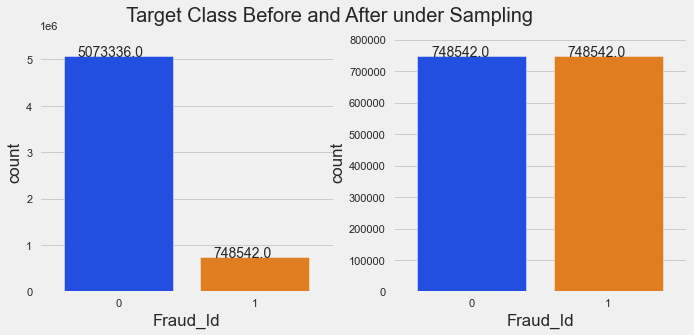

In [128]:
print('original dataset shape:', Counter(y))
print('Resample dataset shape', Counter(y_rus))


fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,4.5))
fig.subplots_adjust(bottom=0.10, left=0.10, top = 0.900, right=1.00)
fig.suptitle(' Target Class Before and After under Sampling', fontsize = 20)
sns.set_palette("bright")
sns.countplot(y, ax=ax1)
ax1.margins(0.1)
#ax1.set_facecolor("#e1ddbf")
for p in ax1.patches:
        ax1.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
sns.set_palette("bright")
sns.countplot(y_rus, ax=ax2)
ax2.margins(0.1)
#ax2.set_facecolor("#e1ddbf")
for p in ax2.patches:
        ax2.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

### Inferance:
      1.It Randomly select data points from Majority Class. 
      2.So performance is not good.
      2.so For better Performance we try different algorithm
      

## 2.TomekLinks

### The Concept: Tomek Links

Tomek Links is one of a modification from Condensed Nearest Neighbors (CNN) undersampling technique that is developed by Tomek (1976). Unlike the CNN method that are only randomly select the samples with its k nearest neighbors from the majority class that wants to be removed, the Tomek Links method uses the rule to selects the pair of observation (say, a and b) that are fulfilled these properties:

    The observation a’s nearest neighbor is b.
    The observation b’s nearest neighbor is a.
    Observation a and b belong to a different class. That is, a and b belong to the minority and majority class 
    (or vice versa), respectively.
    
Tomek links are pairs of instances of opposite classes who are their own nearest neighbors. In other words, they are pairs of opposing instances that are very close together. Tomek's algorithm looks for such pairs and removes the majority instance of the pair.

In [129]:
# import library


tl = TomekLinks(sampling_strategy='auto')

# fit predictor and target variable
X_tl, y_tl = tl.fit_resample(X, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_tl))

Original dataset shape Counter({0: 5073336, 1: 748542})
Resample dataset shape Counter({0: 5003059, 1: 748542})


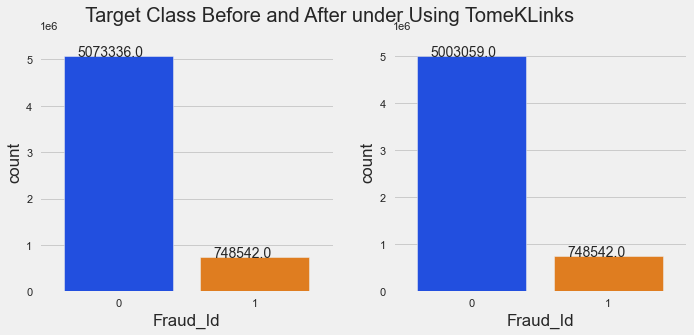

In [130]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,4.5))
fig.subplots_adjust(bottom=0.10, left=0.10, top = 0.900, right=1.00)
fig.suptitle(' Target Class Before and After under Using TomeKLinks', fontsize = 20)
sns.set_palette("bright")
sns.countplot(y, ax=ax1)
ax1.margins(0.1)
#ax1.set_facecolor("#e1ddbf")
for p in ax1.patches:
        ax1.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
sns.set_palette("bright")
sns.countplot(y_tl, ax=ax2)
ax2.margins(0.1)
#ax2.set_facecolor("#e1ddbf")
for p in ax2.patches:
        ax2.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

### Inferences:
      1.SO here Tomeklink Approach only remove Klinked Neighbours in the Neighbourhood Of Minority Class
      2.The Tomeklinks Actually use Klinks method based on euclidean distance measurement to find the Neighbours points.

## Combination Of TomeKlinks And NearMiss(Tomeklinks +NearMiss)

In [131]:
nm = NearMiss(sampling_strategy='majority')

# fit predictor and target variable
x_nm, y_nm = nm.fit_resample(X_tl, y_tl)

print('Tomeklinks dataset shape', Counter(y_tl))
print('Combination Of TomeKlinks And NearMiss Sampling dataset shape', Counter(y_nm))

Tomeklinks dataset shape Counter({0: 5003059, 1: 748542})
Resample dataset shape Counter({0: 748542, 1: 748542})


Tomeklinks dataset shape Counter({0: 5003059, 1: 748542})
Resample dataset shape Counter({0: 748542, 1: 748542})


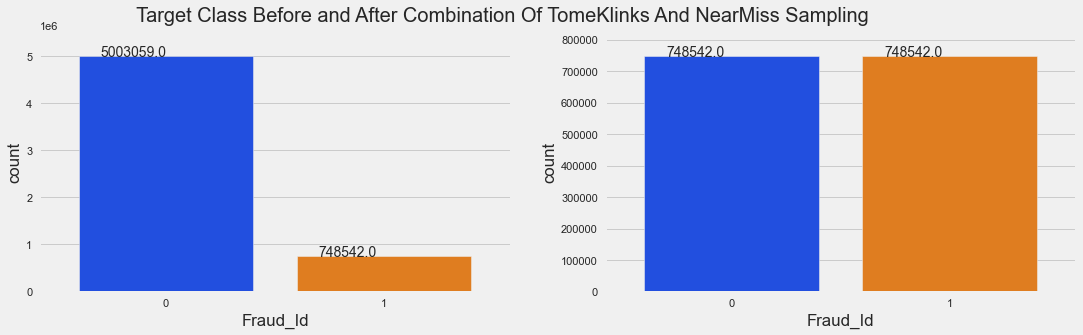

In [133]:
print('Tomeklinks dataset shape', Counter(y_tl))
print('Resample dataset shape', Counter(y_nm))

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,4.5))
fig.subplots_adjust(bottom=0.10, left=0.10, top = 0.900, right=1.00)
fig.suptitle(' Target Class Before and After Combination Of TomeKlinks And NearMiss Sampling', fontsize = 20)

sns.countplot(y_tl, ax=ax1)
ax1.margins(0.1)

for p in ax1.patches:
        ax1.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
sns.set_palette("bright")
sns.countplot(y_nm, ax=ax2)
ax2.margins(0.1)

for p in ax2.patches:
        ax2.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))


#### Inferences:
     1.With  the use of Tomeklinks and NearMiss we are able to down sample the data 
     2.The Tomeklinks Actually use Klinks method based on euclidean distance measurement to find the observation data points
     

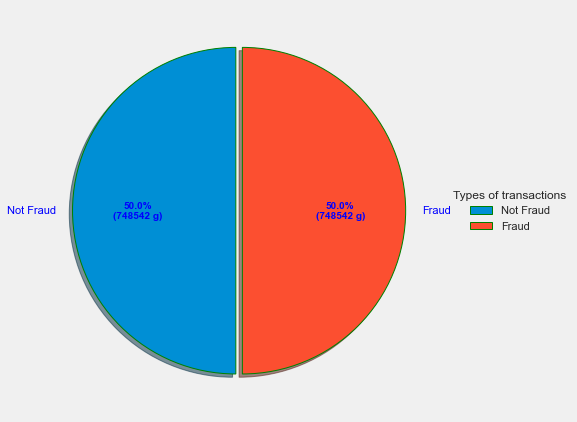

In [137]:

explode = (0.02, 0.02)
sns.set_palette("hls")
plt.style.use('fivethirtyeight')
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)
 
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(y_nm.value_counts(),
                                  autopct = lambda pct: func(pct, y_nm.value_counts()),
                                  explode = explode,
                                  labels =['Not Fraud','Fraud'],
                                  shadow = True,
                                  
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="blue"))
 
# Adding legend
ax.legend(wedges,['Not Fraud','Fraud'],
          title ="Types of transactions",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts, size = 10, weight ="bold")
plt.show()

#### Inferences:
     1.With  the use of Tomeklinks and NearMiss we are able to down sample the data 
     2.The Tomeklinks Actually use Klinks method based on euclidean distance measurement
     3.so this approach is better than using random underesampler or Synthetic Minority Analysis
     
     

In [138]:
new_balanced_data=pd.concat([x_nm, y_nm],axis=1)
new_balanced_data

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,typeid,Fraud_Id
0,486889.15,259210.00,0.0,0.000000e+00,0.000000e+00,4,0
1,486889.15,259210.00,0.0,0.000000e+00,0.000000e+00,4,0
2,486889.15,259210.00,0.0,2.150636e+06,2.555206e+06,4,0
3,486889.15,259210.00,0.0,2.150636e+06,2.555206e+06,4,0
4,486889.15,259210.00,0.0,0.000000e+00,2.555206e+06,4,0
...,...,...,...,...,...,...,...
1497079,323726.61,259210.00,0.0,5.617536e+05,8.854802e+05,1,1
1497080,144945.34,144945.34,0.0,0.000000e+00,1.449453e+05,1,1
1497081,54652.46,54652.46,0.0,0.000000e+00,5.465246e+04,1,1
1497082,303846.74,259210.00,0.0,3.436609e+05,6.475076e+05,1,1


In [139]:
new_balanced_data.to_csv("new_balanced_data.csv",index=False)